In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [3]:
# For creating model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [4]:
!pip install pandas tensorflow
import tensorflow as tf

2024-02-25 11:53:06.571998: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [5]:
df = pd.read_csv ("../ML_Loan_Prediction_Model/preprocessed_train_data.csv")

In [6]:
df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,Y,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,N,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,Y,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,Y,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,Y,1,0,0,0,0,0,1


In [7]:
df.describe()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
count,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000,598.000000
mean,0.185619,0.648829,0.777592,0.130435,6923.752375,144.259480,342.341137,0.856187,0.571906,0.182274,0.165552,0.080268,0.292642,0.376254,0.331104
std,0.389124,0.477736,0.416212,0.337063,6220.893093,81.332436,64.494977,0.351193,0.495217,0.386394,0.371989,0.271934,0.455356,0.484851,0.471004
min,0.000000,0.000000,0.000000,0.000000,1442.000000,9.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,4154.750000,100.000000,360.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,1.000000,0.000000,5416.500000,125.000000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,0.000000,7452.500000,163.500000,360.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,81000.000000,650.000000,480.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [8]:
df.dtypes

Gender                       int64
Married                      int64
Education                    int64
Self_Employed                int64
Total_Income               float64
LoanAmount                 float64
Loan_Amount_Term           float64
Credit_History             float64
Loan_Status                 object
Dependents_0                 int64
Dependents_1                 int64
Dependents_2                 int64
Dependents_3+                int64
Property_Area_Rural          int64
Property_Area_Semiurban      int64
Property_Area_Urban          int64
dtype: object

In [9]:

# Check for null values
df['Loan_Status'].isnull().sum()


0

In [ ]:
df_dummied = pd.get_dummies(df[['Loan_Status']], dtype='int')
df_dummied

In [10]:
# Encoding Loan_Status Column by setting yes as 1 and no as 0 
# Null values will also be encoded as 0 using this method
def encode_loan(loan):
    if loan == "Y":
        return 1
    else:
        return 0

# Call the encode_loan function on the Loan_Status column
df["Loan_Status"] = df["Loan_Status"].apply(encode_loan)

# Review the DataFrame 
df.head()

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,1,0,0,0,0,0,1


In [11]:
# Principal Component Analysis for Reduction
from sklearn.decomposition import PCA

# For Shuffling the DataFrame
from sklearn.utils import shuffle

In [12]:
# Split our preprocessed data into our features and target arrays
X = df.drop("Loan_Status", axis=1)
y = df.Loan_Status

In [13]:
X

,Gender,Married,Education,Self_Employed,Total_Income,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,0,0,1,0,5849.0,121.0,360.0,1.0,1,0,0,0,0,0,1
1,0,1,1,0,6091.0,128.0,360.0,1.0,0,1,0,0,1,0,0
2,0,1,1,1,3000.0,66.0,360.0,1.0,1,0,0,0,0,0,1
3,0,1,0,0,4941.0,120.0,360.0,1.0,1,0,0,0,0,0,1
4,0,0,1,0,6000.0,141.0,360.0,1.0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
593,1,0,1,0,2900.0,71.0,360.0,1.0,1,0,0,0,1,0,0
594,0,1,1,0,4106.0,40.0,180.0,1.0,0,0,0,1,1,0,0
595,0,1,1,0,8312.0,253.0,360.0,1.0,0,1,0,0,0,0,1
596,0,1,1,0,7583.0,187.0,360.0,1.0,0,0,1,0,0,0,1


In [14]:
y

0      1
1      0
2      1
3      1
4      1
      ..
593    1
594    1
595    1
596    1
597    0
Name: Loan_Status, Length: 598, dtype: int64

In [15]:
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=78)

In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
# Define the model - deep neural net with 3 Hidden Layers, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

In [18]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 7)                 112       
                                                                 
 dense_1 (Dense)             (None, 14)                112       
                                                                 
 dense_2 (Dense)             (None, 21)                315       
                                                                 
 dense_3 (Dense)             (None, 1)                 22        
                                                                 
Total params: 561 (2.19 KB)
Trainable params: 561 (2.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [19]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [20]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}".format(model_loss, model_accuracy))
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


5/5 - 0s - loss: 0.6682 - accuracy: 0.6400 - 396ms/epoch - 79ms/step
Loss: 0.6681942939758301, Accuracy: 0.6399999856948853


In [63]:
# Define the model - deep neural net with 6 Hidden Layers, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len( X_train_scaled[0])
hidden_nodes_layer1=7
hidden_nodes_layer2=14
hidden_nodes_layer3=21
hidden_nodes_layer4=21
hidden_nodes_layer5=28
hidden_nodes_layer6=28
nn = tf.keras.models.Sequential()

nn = tf.keras.models.Sequential()

In [64]:
# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation='relu'))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation='relu'))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation='tanh'))

# Fourth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer4, activation='linear'))

# Fifth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer5, activation='relu'))

# Sixth hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer6, activation='tanh'))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Check the structure of the model
nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 7)                 112       
                                                                 
 dense_5 (Dense)             (None, 14)                112       
                                                                 
 dense_6 (Dense)             (None, 21)                315       
                                                                 
 dense_7 (Dense)             (None, 21)                462       
                                                                 
 dense_8 (Dense)             (None, 28)                616       
                                                                 
 dense_9 (Dense)             (None, 28)                812       
                                                                 
 dense_10 (Dense)            (None, 1)                

In [65]:
# Compile the model
nn.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [66]:
# Evaluate the model using the test data
# model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
# print(f"Loss: {model_loss}, Accuracy: {model_accuracy}".format(model_loss, model_accuracy))
# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")


5/5 - 0s - loss: 0.6568 - accuracy: 0.7000 - 461ms/epoch - 92ms/step
Loss: 0.6567659974098206, Accuracy: 0.699999988079071


In [ ]:
Making Predictions Using the Tree Model

In [21]:
!pip install Graphviz

In [22]:
!pip install pydotplus

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
# Needed for decision tree visualization
import pydotplus
from IPython.display import Image
from sklearn import tree

In [55]:
# Create the decision tree classifier instance
model = tree.DecisionTreeClassifier(max_depth=4)

In [56]:
# Fit the model
model = model.fit(X_train_scaled, y_train)

In [57]:
# Create the StandardScaler instance
scaler = StandardScaler()

In [58]:
# Fit the Standard Scaler with the training data
X_scaler = scaler.fit(X_test)

In [59]:
# Scale the training data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
# Making predictions using the testing data
predictions = model.predict(X_test_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Model Evaluation

In [61]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score


0.7666666666666667

In [62]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,14,32
Actual 1,3,101


Accuracy Score : 0.7666666666666667
Classification Report
              precision    recall  f1-score   support

           0       0.82      0.30      0.44        46
           1       0.76      0.97      0.85       104

    accuracy                           0.77       150
   macro avg       0.79      0.64      0.65       150
weighted avg       0.78      0.77      0.73       150



Visualizing the Decision Tree

In [ ]:
# Create DOT data
dot_data = tree.export_graphviz(
    model, out_file=None, feature_names=X.columns, class_names=["0", "1"], filled=True
)

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)

# Show graph
Image(graph.create_png())


In [ ]:
# When saving the image, Path() is not used because graph.write_<file_type>() must take a string object

# Saving the tree as PDF
file_path = "../Resources/lending_tree.pdf"
graph.write_pdf(file_path)

# Saving the tree as PNG
file_path = "../Resources/lending_tree.png"
graph.write_png(file_path)

Create a Logistic Regression Model

In [33]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(solver='lbfgs',
                                max_iter=200,
                                random_state=1)
classifier

LogisticRegression(max_iter=200, random_state=1)

Fit(Train) or Model Using the Training Data

In [34]:
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=1)

Score the Model Using Test Data

In [35]:
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")

Training Data Score: 0.8258928571428571
Testing Data Score: 0.76


Make Predictions

In [36]:
predictions = classifier.predict(X_test)
results = pd.DataFrame({"Prediction": predictions, "Actual": y_test}).reset_index(drop=True)
results.head(10)

,Prediction,Actual
0,1,0
1,1,1
2,1,0
3,1,1
4,1,1
5,1,1
6,1,0
7,1,1
8,0,1
9,1,1


Calculate the Accuracy Score

In [37]:
from sklearn.metrics import accuracy_score
# Display the accuracy score for the test dataset.
accuracy_score(y_test, predictions)

0.76

Making Predictions Using the Random Forest

In [38]:
# Create the random forest classifier instance
rf_model = RandomForestClassifier(n_estimators=500, random_state=78)

In [39]:
# Fit the model and use .ravel()on the "y_train" data. 
rf_model = rf_model.fit(X_train_scaled, y_train.ravel())

In [40]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test_scaled)
predictions

array([1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [41]:
# Calculating the confusion matrix
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)
acc_score

0.78

In [42]:
# Displaying results
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,19,27
Actual 1,6,98


Accuracy Score : 0.78
Classification Report
              precision    recall  f1-score   support

           0       0.76      0.41      0.54        46
           1       0.78      0.94      0.86       104

    accuracy                           0.78       150
   macro avg       0.77      0.68      0.70       150
weighted avg       0.78      0.78      0.76       150



In [43]:
# Get the feature importance array
importances = rf_model.feature_importances_
# List the top 10 most important features
importances_sorted = sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)
importances_sorted[:10]

[(0.2780519629197567, 'Credit_History'),
 (0.23996092309229708, 'Total_Income'),
 (0.21316330537877512, 'LoanAmount'),
 (0.0370048117151294, 'Loan_Amount_Term'),
 (0.028493847557771054, 'Education'),
 (0.02682100557423989, 'Married'),
 (0.025262045193459197, 'Gender'),
 (0.024811366716229286, 'Self_Employed'),
 (0.02154119501809056, 'Property_Area_Semiurban'),
 (0.019971562684050995, 'Property_Area_Rural')]

Support Vector Classifier

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [50]:
# Create an SVC model
model = SVC()


In [51]:
# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model's accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.68


In [53]:
import seaborn as sb
sb.set()

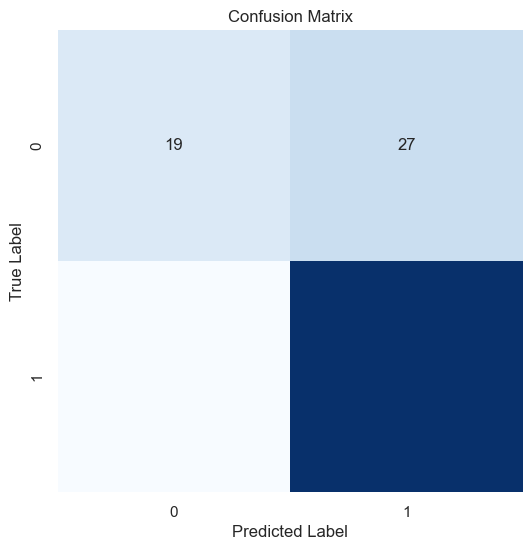

In [54]:
plt.figure(figsize=(6, 6))
sb.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


Making Predictions Using XGBoost

In [67]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata (2.0 kB)
Using cached xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (2.2 MB)


In [68]:
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [69]:

# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [71]:
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]

In [72]:
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.33%


In [76]:
# First XGBoost model dataset
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# load data
dataset = pd.read_csv('../ML_Loan_Prediction_Model/preprocessed_train_data.csv', delimiter=",")

# split data into train and test sets
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=seed)
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 75.25%
